glue() records a "Scrap" (data or display value) in the given notebook cell.
The scrap (recorded value) can be retrieved during later inspection of the output notebook

In [1]:
import scrapbook as sb

sb.glue("hello", "world")
sb.glue("number", 123)
sb.glue("some_list", [1, 3, 5])
sb.glue("some_dict", {"a": 1, "b": 2})

The scrapbook library can be used later to recover scraps from the output notebook:

nb = sb.read_notebook('notebook.ipynb')
scraps = nb.scraps

scrapbook will imply the storage format by the value type of any registered data encoders. This encoder can be overwritten by setting the encoder argument to the registered name (e.g. "json") of a particular encoder. 

# Display Outputs

To display a named scrap with visible display outputs, you need to indicate that the scrap is directly renderable

In [2]:
sb.glue("hello", "Hello World", display = True)

'Hello World'

The call will save the data and the display attributes of the Scrap object, making it visible as well as encoding the original data.

We can instead specitfy that only the display data should be saved, and not the original object, by setting the ecoder to be "display"

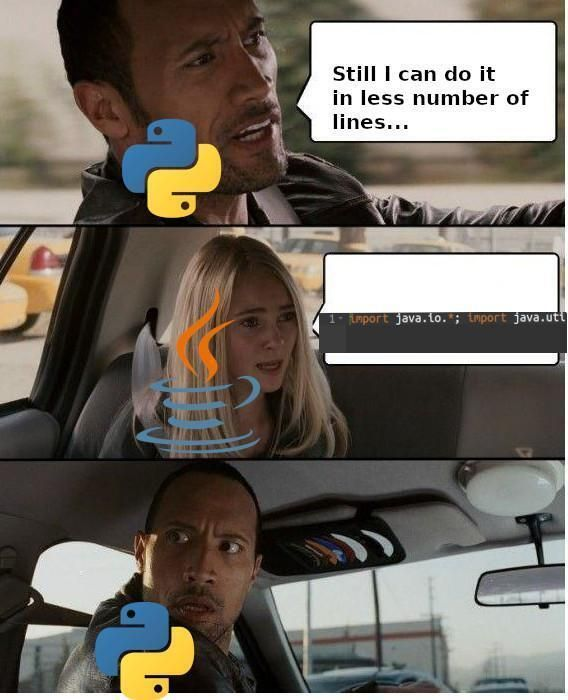

In [3]:
# record an image without the original input object

import IPython

sb.glue("sharable_png", IPython.display.Image(filename = "test.jpeg"), encoder = "display")

The media types that are generated can be controlled by passing a list, tuple, or dict object as the display arguement.

In [4]:
media_obj = "test.jpeg"

sb.glue("media_as_text_only",
        media_obj, 
        encoder = "display", 
        display=("text/plain",)
        )

sb.glue("media_without_text",
        media_obj,
        encoder = "display",
        display = {"exclude" : "text/plain"}
)


'test.jpeg'

# An example using display data

The following generates a Matplotlib plot and saves only the display data as scrap.
This allows you to import the plot into another notebook

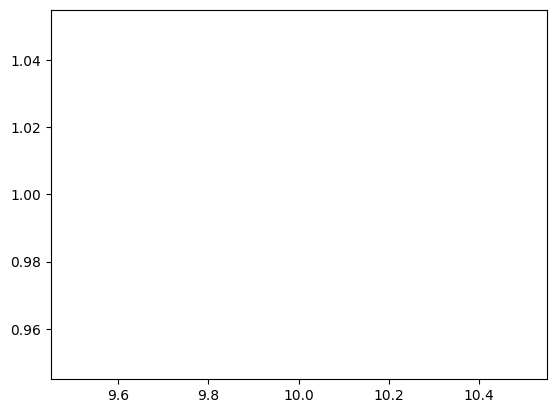

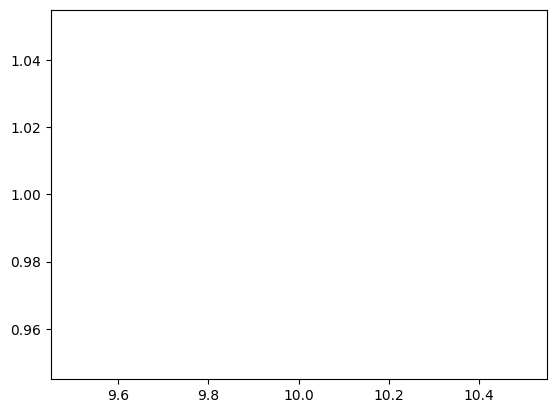

In [5]:
import matplotlib.pyplot as plt

# Generate our plot
x = 10
y = 1
fig, ax = plt.subplots()
ax.plot(x,y)

# We use *fig* as IPython knows how to display this.
sb.glue("sharable_plot", fig, "display")

This glues only the display information. In another notebook, it can be accessed and displayed like so:

# To display the image and reglue it
nb.reglue('sharable_plot')

# To access the display information directly
nb.scraps['sharable_plot'].display['data']['image/png']